<a href="https://colab.research.google.com/github/lucaskydelima/Optimization-with-Python-Pyomo/blob/main/S2Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyomo

In [3]:
import os
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

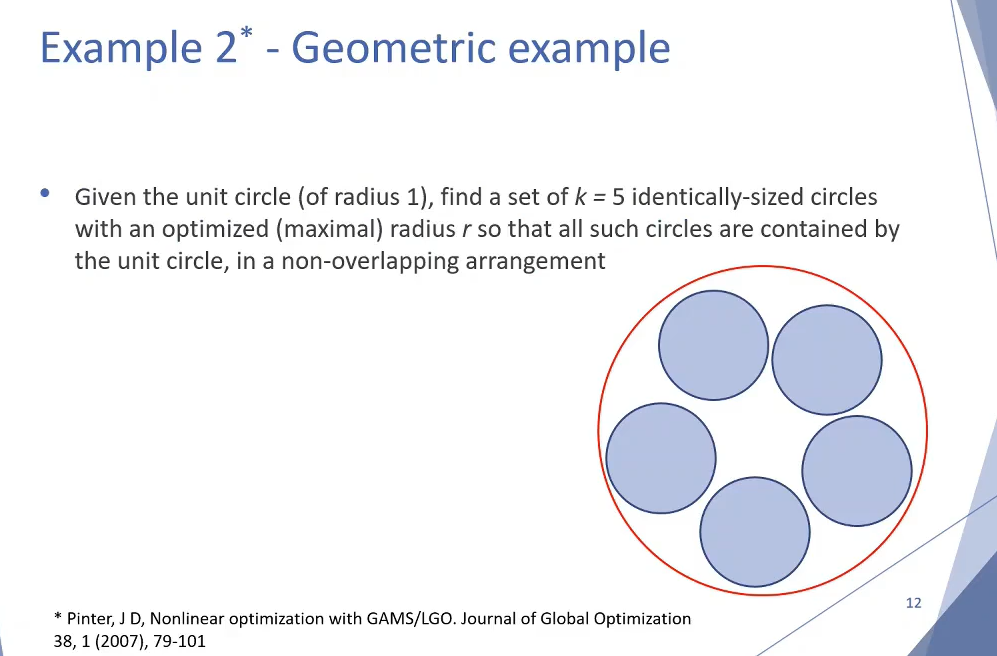

In [12]:
# Defining the model
model_circle = pyo.ConcreteModel()

# Sets
model_circle.i = pyo.RangeSet(1,5)
model_circle.j = pyo.Set(initialize=model_circle.i) # creates an alias of set i

# Decision Variables
def init(model_circle, l):
  return -0.2 + l*0.1
model_circle.x = pyo.Var(model_circle.i, domain=pyo.Reals, bounds=(-1,1), initialize=init)
model_circle.y = pyo.Var(model_circle.i, domain=pyo.Reals, bounds=(-1,1), initialize=init)
model_circle.radius = pyo.Var(domain=pyo.NonNegativeReals, bounds=(0, 0.4472))

# Objective Function
model_circle.obj = pyo.Objective(expr=model_circle.radius, sense=pyo.maximize)

# Constraints
def Constraint_1(model_circle, i):
  return model_circle.x[i]**2 + model_circle.y[i]**2 <= (1-model_circle.radius)**2

model_circle.const1 = pyo.Constraint(model_circle.i, rule=Constraint_1, doc = 'Contained constraint')

def Constraint_2(model_circle, i, j):
  if i < j:
    return (model_circle.x[i] - model_circle.x[j])**2 + (model_circle.y[i] - model_circle.y[j])**2 >= 4*(model_circle.radius**2)
  return pyo.Constraint.Skip

model_circle.const2 = pyo.Constraint(model_circle.i, model_circle.j, rule=Constraint_2, doc = 'No overlap constraint')

# Solve - KNITRO
os.environ['NEOS_EMAIL'] = 'lucaskydelima@gmail.com'
results = pyo.SolverManagerFactory('neos').solve(model_circle, opt='knitro')

results.write()
print('\n RESULTS \n')
print('Radius of identically sized circles = ', model_circle.obj())
for i in model_circle.i:
  print('Coordinates of circle', i, '=> (', model_circle.x[i](), ',', model_circle.y[i](), ')')


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 15
  Number of variables: 11
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Knitro 13.2.0\x3a Locally optimal or satisfactory solution.; objective 0.3701919081961928; feasibility error 7.87e-11; 29 iterations; 0 function evaluations
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
So

In [33]:
import matplotlib.pyplot as plt
import numpy as np

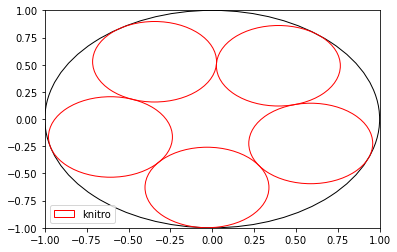

In [51]:
fig, ax = plt.subplots()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

# IPOPT
circle0 = plt.Circle((0, 0), 1, fill=False)
circle1 = plt.Circle((-0.6079343436447511, -0.16454198976949191), 0.3701919081961928, fill=False, color='red', label='knitro')
circle2 = plt.Circle((-0.03137331207590303 , -0.6290261901300119), 0.3701919081961928, fill=False, color='red')
circle3 = plt.Circle((-0.3443507752248442, 0.5273336478758939), 0.3701919081961928, fill=False, color='red')
circle4 = plt.Circle((0.5885445704422579, -0.22421757554470678), 0.3701919081961928, fill=False, color='red')
circle5 = plt.Circle((0.3951138605034772, 0.49045210756829766), 0.3701919081961928, fill=False, color='red')

ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)

plt.legend()
plt.show()

In [26]:
# Solve - IPOPT
os.environ['NEOS_EMAIL'] = 'lucaskydelima@gmail.com'
results = pyo.SolverManagerFactory('neos').solve(model_circle, opt='ipopt')

results.write()
print('\n RESULTS \n')
print('Radius of identically sized circles = ', model_circle.obj())
for i in model_circle.i:
  print('Coordinates of circle', i, '=> (', model_circle.x[i](), ',', model_circle.y[i](), ')')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 15
  Number of variables: 11
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.5\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

 RESULTS 

Radius of identically sized circles 

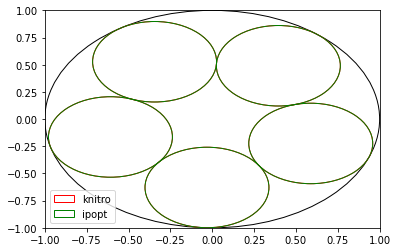

In [53]:
fig, ax = plt.subplots()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

# IPOPT
circle0 = plt.Circle((0, 0), 1, fill=False)
circle1 = plt.Circle((-0.6079343436447511, -0.16454198976949191), 0.3701919081961928, fill=False, color='red', label='knitro')
circle2 = plt.Circle((-0.03137331207590303 , -0.6290261901300119), 0.3701919081961928, fill=False, color='red')
circle3 = plt.Circle((-0.3443507752248442, 0.5273336478758939), 0.3701919081961928, fill=False, color='red')
circle4 = plt.Circle((0.5885445704422579, -0.22421757554470678), 0.3701919081961928, fill=False, color='red')
circle5 = plt.Circle((0.3951138605034772, 0.49045210756829766), 0.3701919081961928, fill=False, color='red')

ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)

# KNITRO
circle6 = plt.Circle((-0.6079357047752674, -0.16453695941077007), 0.3701919041333982, fill=False, color='green', label='ipopt')
circle7 = plt.Circle((-0.031378516843865056 , -0.6290259301757136), 0.3701919041333982, fill=False, color='green')
circle8 = plt.Circle((-0.3443464116818724, 0.5273364968542958), 0.3701919041333982, fill=False, color='green')
circle9 = plt.Circle((0.5885427148491977, -0.22422244524284016), 0.3701919041333982, fill=False, color='green')
circle10 = plt.Circle((0.3951179184518069, 0.4904488379750263), 0.3701919041333982, fill=False, color='green')

ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)
ax.add_patch(circle9)
ax.add_patch(circle10)

plt.legend()
plt.show()

In [55]:
# Solve - BONMIN
os.environ['NEOS_EMAIL'] = 'lucaskydelima@gmail.com'
results = pyo.SolverManagerFactory('neos').solve(model_circle, opt='bonmin')

results.write()
print('\n RESULTS \n')
print('Radius of identically sized circles = ', model_circle.obj())
for i in model_circle.i:
  print('Coordinates of circle', i, '=> (', model_circle.x[i](), ',', model_circle.y[i](), ')')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 11
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

 RESULTS 

Radius of identically sized circles =  0.3701919020566474


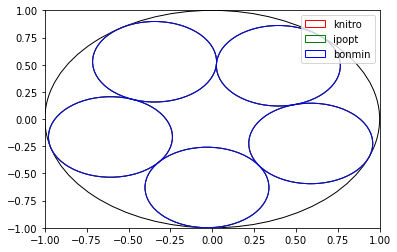

In [56]:
# IPOPT
fig, ax = plt.subplots()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

circle0 = plt.Circle((0, 0), 1, fill=False)
circle1 = plt.Circle((-0.6079343436447511, -0.16454198976949191), 0.3701919081961928, fill=False, color='red', label='knitro')
circle2 = plt.Circle((-0.03137331207590303 , -0.6290261901300119), 0.3701919081961928, fill=False, color='red')
circle3 = plt.Circle((-0.3443507752248442, 0.5273336478758939), 0.3701919081961928, fill=False, color='red')
circle4 = plt.Circle((0.5885445704422579, -0.22421757554470678), 0.3701919081961928, fill=False, color='red')
circle5 = plt.Circle((0.3951138605034772, 0.49045210756829766), 0.3701919081961928, fill=False, color='red')

ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)

# KNITRO
circle6 = plt.Circle((-0.6079357047752674, -0.16453695941077007), 0.3701919041333982, fill=False, color='green', label='ipopt')
circle7 = plt.Circle((-0.031378516843865056 , -0.6290259301757136), 0.3701919041333982, fill=False, color='green')
circle8 = plt.Circle((-0.3443464116818724, 0.5273364968542958), 0.3701919041333982, fill=False, color='green')
circle9 = plt.Circle((0.5885427148491977, -0.22422244524284016), 0.3701919041333982, fill=False, color='green')
circle10 = plt.Circle((0.3951179184518069, 0.4904488379750263), 0.3701919041333982, fill=False, color='green')

ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)
ax.add_patch(circle9)
ax.add_patch(circle10)

# BONMIN
circle6 = plt.Circle((-0.6079357028094795, -0.16453695791576192), 0.3701919020566474, fill=False, color='blue', label='bonmin')
circle7 = plt.Circle((-0.031378516508383816 , -0.6290259279803225), 0.3701919020566474, fill=False, color='blue')
circle8 = plt.Circle((-0.3443464096949897, 0.527336495222134), 0.3701919020566474, fill=False, color='blue')
circle9 = plt.Circle((0.5885427130414052, -0.22422244340180825), 0.3701919020566474, fill=False, color='blue')
circle10 = plt.Circle((0.3951179165438349, 0.49044883632486264), 0.3701919020566474, fill=False, color='blue')

ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)
ax.add_patch(circle9)
ax.add_patch(circle10)

plt.legend()
plt.show()